# QCoDeS OPX simulator

Import generic packages

In [1]:
from scipy import signal
from scipy.fftpack import fft, fftshift

import numpy as np
import matplotlib.pyplot as plt

Importing **RF2v** specific config files

In [2]:
from arbok.samples.sunshine.configs.rf2v_config import rf2v_config
from dummy_config import dummy_config

from GeneralMeasurement import GeneralMeasurement_1Q

2023-07-03 15:52:38,382 - qm - INFO     - Starting session: 451f06de-642e-447c-8172-fd49cfb75946


Importing Quantum Machines tools and instanciate QMM from remote simulation OPX.

In [3]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.simulate.credentials import create_credentials

In [4]:
QMM = QuantumMachinesManager(
    host='dzurak-6d066ea0.quantum-machines.co',
    port=443,
    credentials=create_credentials()
)

2023-07-03 15:52:44,826 - qm - INFO     - Performing health check
2023-07-03 15:52:45,684 - qm - INFO     - Health check passed


In [5]:
from MeasurementBlueprint import MeasurementBlueprint
MB = MeasurementBlueprint()

Importing and instanciating OPX QCoDeS driver

In [5]:
import os
import qcodes as qc
from qcodes import initialise_or_create_database_at, load_or_create_experiment
from qcodes.utils.dataset.doNd import do2d, do1d, do0d
from qcodes import Parameter
from qualang_tools.external_frameworks.qcodes.opx_driver import OPX

In [6]:
from qm.qua import *
from qm import SimulationConfig
from qm import LoopbackInterface

In [8]:
with program() as prog1:
    a = declare(fixed)
    c = declare(fixed, value=0.4)

    with for_(a, 0.2, a < 0.9, a + 0.1):
            play("constPulse" * amp(a), "qe1")

    save(c, "c")

2023-06-28 21:02:51,385 - qm - INFO     - Simulating program
2023-06-28 21:02:52,475 - qm - WARNING  - pulse 'constPulse' used in play is not part of element 'qe1' operations


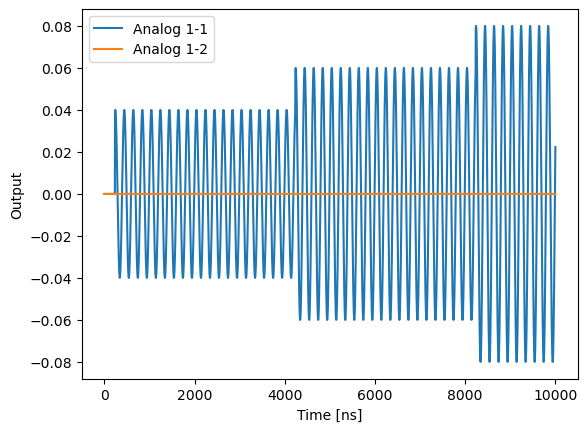

In [9]:
job = QMM.simulate(dummy_config, prog1, SimulationConfig(duration=2500))

samples = job.get_simulated_samples()
samples.con1.plot()

In [10]:
MB = MeasurementBlueprint()

rf2v_prog = MB.run_sequence()

AttributeError: 'MeasurementBlueprint' object has no attribute 'fESR'

In [ ]:
job_rf2v = QMM.simulate(rf2v_config, rf2v_prog, SimulationConfig(duration=2500))